In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [2]:
DIR_d1 = 'd1_code/histogram_plots'
DIR_mhist = 'code_mhist/histogram_plots'
DIR_isic = 'd3_skin_code/histogram_plots'

histogram_files = [DIR_d1, DIR_mhist, DIR_isic]
datasets = ['d1','MHIST','isic']
archs= ['Resnet34', 'Resnet50']
methods = ['baseline', 'ls', 'baseline_fl', 'baseline_dca', 'baseline_mdca', 'ours_alpha05']
pred = ['correctpredictions', 'incorrectpredictions']

pred_dict = {}
for d_idx, each_file in enumerate(histogram_files):

    pred_dict[datasets[d_idx]]= {}
    for ar in archs:
        pred_dict[datasets[d_idx]][ar] = {}
        
        for mtd_idx, mtd in enumerate(methods):
            pred_dict[datasets[d_idx]][ar][mtd] = {}
            
            pred_dict[datasets[d_idx]][ar][mtd]['correctpredictions'] = np.loadtxt(f'{each_file}/{datasets[d_idx]}_{ar}_{mtd.upper()}_correct.txt')
            pred_dict[datasets[d_idx]][ar][mtd]['incorrectpredictions'] = np.loadtxt(f'{each_file}/{datasets[d_idx]}_{ar}_{mtd.upper()}_incorrect.txt')

In [3]:
print(pred_dict[datasets[0]][archs[0]][methods[0]]["incorrectpredictions"][:10])
print(pred_dict[datasets[1]][archs[0]][methods[0]]["incorrectpredictions"][:10])
print(pred_dict[datasets[2]][archs[0]][methods[0]]["incorrectpredictions"][:10])

# # # print(pred_dict[datasets[1]][archs[0]][methods[0]]["incorrectpredictions"][:10])
# # # print(pred_dict[datasets[1]][archs[1]][methods[0]]["incorrectpredictions"][:10])

[0.997817 0.971567 0.986081 0.723263 0.996578 0.714906 0.997347 0.704974
 0.979965 0.984586]
[0.71477  0.73092  0.590155 0.955789 0.742554 0.96909  0.929248 0.518813
 0.902124 0.829504]
[0.810845 0.494192 0.481371 0.571995 0.493184 0.988466 0.517965 0.664043
 0.925066 0.864643]


In [4]:
# DIR_mhist = 'code_mhist/histogram_plots'
# filename = f'{DIR_mhist}/histogram.csv'

# df = pd.read_csv(filename)
# df


# baseline = df.iloc[0]
# ls = df.iloc[1]
# fl = df.iloc[2]
# dca = df.iloc[3]
# mdca = df.iloc[4]
# ours = df.iloc[5]

# baseline_correctpredictions = list_to_array(baseline["correctpredictions"])
# baseline_incorrectpredictions = list_to_array(baseline["incorrectpredictions"])
# ls_correctpredictions = list_to_array(ls["correctpredictions"])
# ls_incorrectpredictions = list_to_array(ls["incorrectpredictions"])
# fl_correctpredictions = list_to_array(fl["correctpredictions"])
# fl_incorrectpredictions = list_to_array(fl["incorrectpredictions"])
# dca_correctpredictions = list_to_array(dca["correctpredictions"])
# dca_incorrectpredictions = list_to_array(dca["incorrectpredictions"])
# mdca_correctpredictions = list_to_array(mdca["correctpredictions"])
# mdca_incorrectpredictions = list_to_array(mdca["incorrectpredictions"])
# ours_correctpredictions = list_to_array(ours["correctpredictions"])
# ours_incorrectpredictions = list_to_array(ours["incorrectpredictions"])


# pred_dict = {
#     "mhist": {
#         'baseline': {
#             'correctpredictions': baseline_correctpredictions,
#             'incorrectpredictions': baseline_incorrectpredictions,
#         },
#         'ls': {
#             'correctpredictions': ls_correctpredictions,
#             'incorrectpredictions': ls_incorrectpredictions,
#         },
#         'fl': {
#             'correctpredictions': fl_correctpredictions,
#             'incorrectpredictions': fl_incorrectpredictions,
#         },
#         'dca': {
#             'correctpredictions': dca_correctpredictions,
#             'incorrectpredictions': dca_incorrectpredictions,
#         },
#         'mdca': {
#             'correctpredictions': mdca_correctpredictions,
#             'incorrectpredictions': mdca_incorrectpredictions,
#         },
#         'ours': {
#             'correctpredictions': ours_correctpredictions,
#             'incorrectpredictions': ours_incorrectpredictions,
#         },
#     }
# }




# datasets = ['d1','mhist','isic']
# methods = ['baseline', 'ls', 'fl', 'dca', 'mdca', 'ours']

# plt.figure(figsize=(10, 3))
# plt.subplot(121)
# bins_used=15
# # An "interface" to matplotlib.axes.Axes.hist() method
# n, bins, patches = plt.hist(x=pred_dict[datasets[1]][methods[0]]["correctpredictions"], bins=bins_used, color='#0504aa', alpha=0.7, rwidth=0.85, label='Correct Predictions')
# plt.grid(axis='y', alpha=0.75)
# plt.xlabel('Confidence')
# plt.ylabel('Frequency')
# # plt.title(f'Avg. Conf. [C]{np.average(baseline_correctpredictions)*100:.2f}, Acc: {test_acc*100:.2f}; [C: {len(baseline_correctpredictions)}, InC: {len(baseline_incorrectpredictions)}]', fontsize=12)
# maxfreq = n.max()
# # Set a clean upper y-axis limit.
# plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
# # plt.savefig(f'{histograms_dir}/{m_name}_histogram_correct_{filename}.png', bbox_inches='tight', dpi=300)
# plt.legend()

# plt.subplot(122)
# # An "interface" to matplotlib.axes.Axes.hist() method
# n, bins, patches = plt.hist(x=pred_dict[datasets[1]][methods[0]]["incorrectpredictions"], bins=bins_used, color='#aa0504', alpha=0.7, rwidth=0.85, label='Incorrect Predictions')
# plt.grid(axis='y', alpha=0.75)
# plt.xlabel('Confidence')
# # plt.ylabel('Frequency')
# # plt.title(f'Avg. Conf. [InC]{np.average(incorrect_pred)*100:.2f}, Err: {100-(test_acc*100):.2f}; [C: {len(correct_pred)}, InC: {len(incorrect_pred)}]', fontsize=12)
# maxfreq = n.max()
# # Set a clean upper y-axis limit.
# plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
# # plt.savefig(f'{histograms_dir}/{m_name}_histogram_incorrect_{filename}.png', bbox_inches='tight', dpi=300)
# plt.legend()
# plt.show()
# plt.close()


# Format 3 sns plots with density (Final plots in the paper)

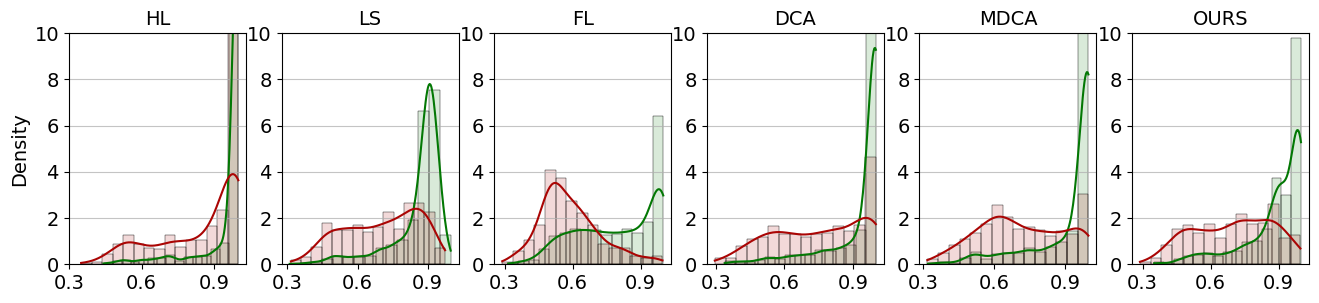

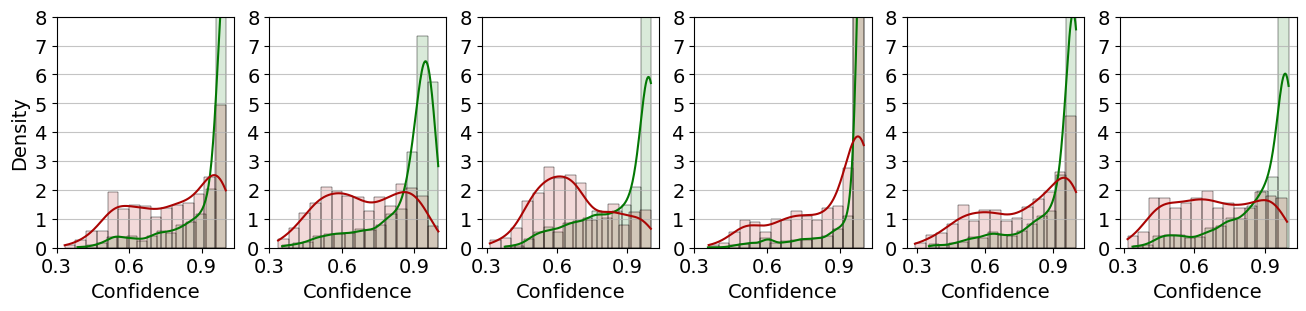

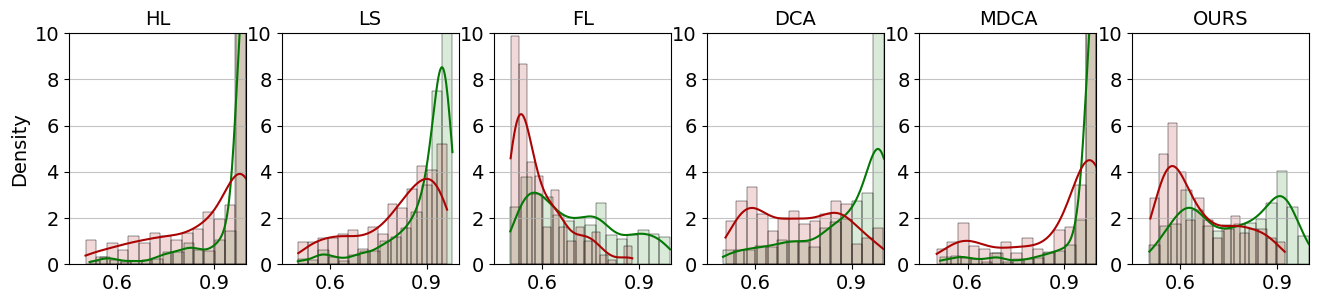

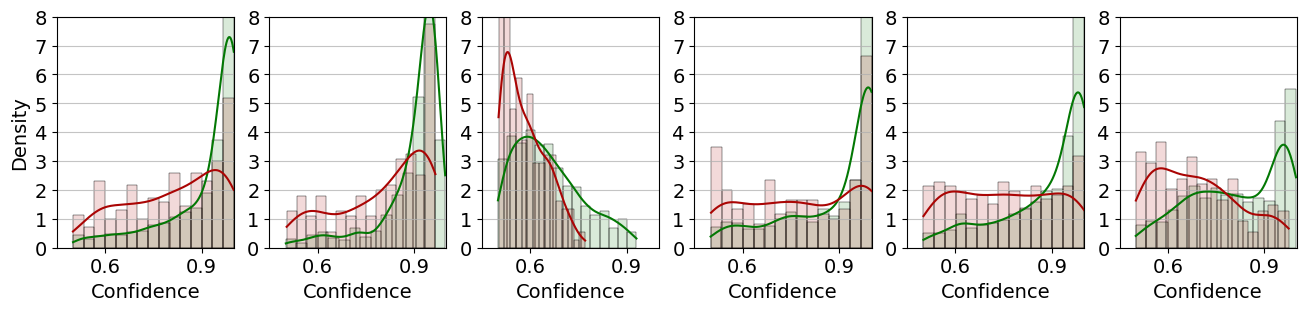

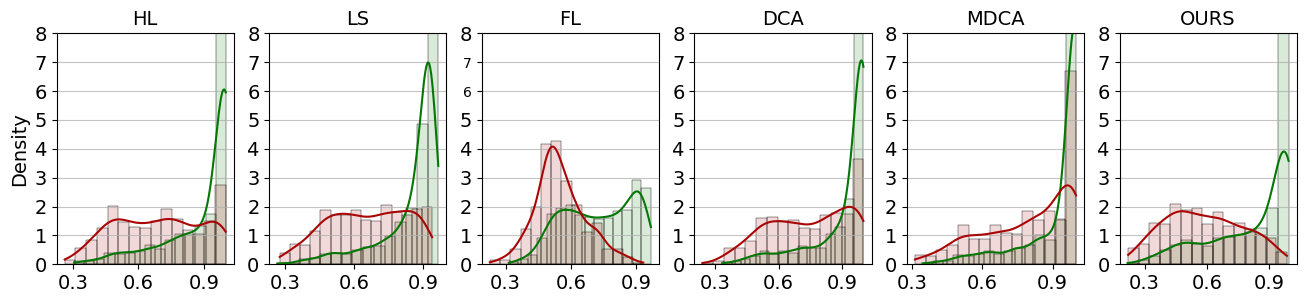

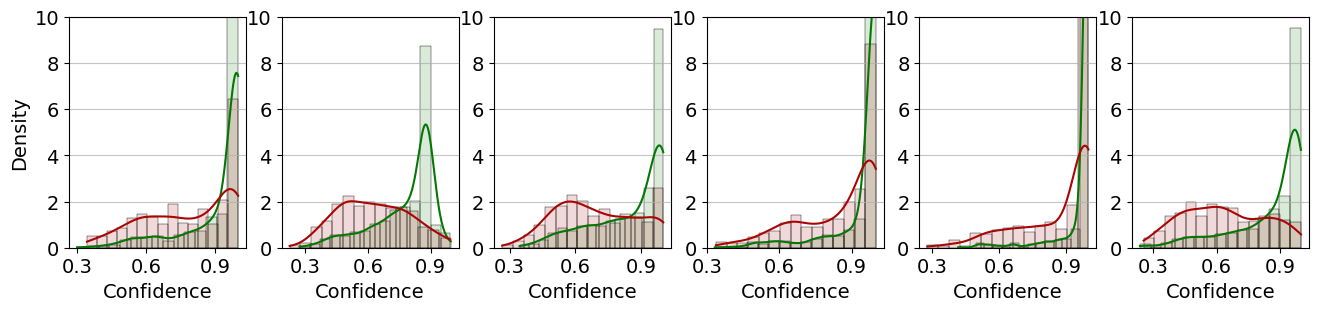

In [6]:
all_histogram_plots_dir = "all_histogram_plots"
if not os.path.exists(all_histogram_plots_dir):
    os.makedirs(all_histogram_plots_dir)
    print(f'Creating {all_histogram_plots_dir} directory...')
        
datasets = ['d1','MHIST','isic']
archs= ['Resnet34', 'Resnet50']
methods = ['baseline', 'ls', 'baseline_fl', 'baseline_dca', 'baseline_mdca', 'ours_alpha05']

num_of_subplots = len(methods)
red, green, blue = '#aa0504', '#037804', '#0504aa' # https://www.colorhexa.com/04aa05

bins_used=15
fs = 14
alp = .15
lw=.3
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams["font.family"] = "monospace"
# plt.rcParams["font.monospace"] = ["FreeMono"]

for ds in datasets:
    for arc_idx, arc in enumerate(archs):
        plt.figure(figsize=(16, 3))
        for idx in range(len(methods)*2):
            if idx <= 5:
                plt.subplot(1,num_of_subplots,idx+1)
                # sns.histplot(pred_dict[ds][archs[arc_idx]][methods[idx%6]]["correctpredictions"], stat="density", bins=bins_used, color=green, alpha=alp, linewidth=lw)
                # sns.histplot(pred_dict[ds][archs[arc_idx]][methods[idx%6]]["incorrectpredictions"], stat="density", bins=bins_used, color=red, alpha=alp, linewidth=lw)
                # sns.histplot(pred_dict[ds][archs[arc_idx]][methods[idx%6]]["correctpredictions"], color=red, bins=15, kde=True, fill=False,  cumulative=True,alpha=alp)
                # sns.histplot(pred_dict[ds][archs[arc_idx]][methods[idx%6]]["incorrectpredictions"], color=green, bins=15, kde=True, fill=False,  cumulative=True,alpha=alp)
                sns.histplot(pred_dict[ds][archs[arc_idx]][methods[idx%6]]["correctpredictions"], color=green, bins=15, kde=True, fill=True, stat='density', common_norm=False, alpha=alp,linewidth=lw)
                sns.histplot(pred_dict[ds][archs[arc_idx]][methods[idx%6]]["incorrectpredictions"], color=red, bins=15, kde=True, fill=True, stat='density', common_norm=False, alpha=alp,linewidth=lw)
                plt.grid(axis='y', alpha=0.75)
                
                if idx == 0:
                    plt.ylabel('Density', fontsize=fs)
                
                # plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
                plt.xticks(np.arange(0.3, 1., 0.3), fontsize=fs)
                plt.yticks(fontsize=fs)
                
                if archs[arc_idx] == 'Resnet50':
                    plt.xlabel('Confidence', fontsize=fs)
                    
                
                #  (Clipping the yaxis)
                if ds== 'd1' and archs[arc_idx] == 'Resnet34':
                    plt.ylim(0, 10)
                if ds== 'd1' and archs[arc_idx] == 'Resnet50':
                    plt.ylim(0, 8)
                    
                if ds== 'MHIST' and archs[arc_idx] == 'Resnet34':
                    plt.ylim(0, 10)
                    plt.xlim(0.45, 1)
                if ds== 'MHIST' and archs[arc_idx] == 'Resnet50':
                    plt.ylim(0, 8)
                    plt.xlim(0.45, 1)
                    
                if ds== 'isic' and archs[arc_idx] == 'Resnet34':
                    plt.ylim(0, 8)
                if ds== 'isic' and archs[arc_idx] == 'Resnet50':
                    plt.ylim(0, 10)
                    
                if methods[idx%6] != 'baseline':
                    plt.ylabel('')

                
                if archs[arc_idx] == 'Resnet34':
                    if methods[idx%6].upper().split("_")[-1] == "BASELINE":
                        plt.title('HL', fontsize=fs)
                    elif methods[idx%6].upper().split("_")[-1] != "ALPHA05":
                        plt.title(f'{methods[idx%6].upper().split("_")[-1]}', fontsize=fs)
                    else:
                        plt.title(f'OURS', fontsize=fs)
                
                
                # plt.legend()

        # plt.subplots_adjust(wspace=.27, hspace=.2)
        # plt.suptitle(f'${ds}$, ${archs[arc_idx]}$', fontsize=fs)
        plt.savefig(f'{all_histogram_plots_dir}/format3_stepfill_{ds}_{archs[arc_idx]}_histogram_plots.png', bbox_inches='tight', dpi=300)
        plt.show()
        plt.close()

# Histogram Bar Plot

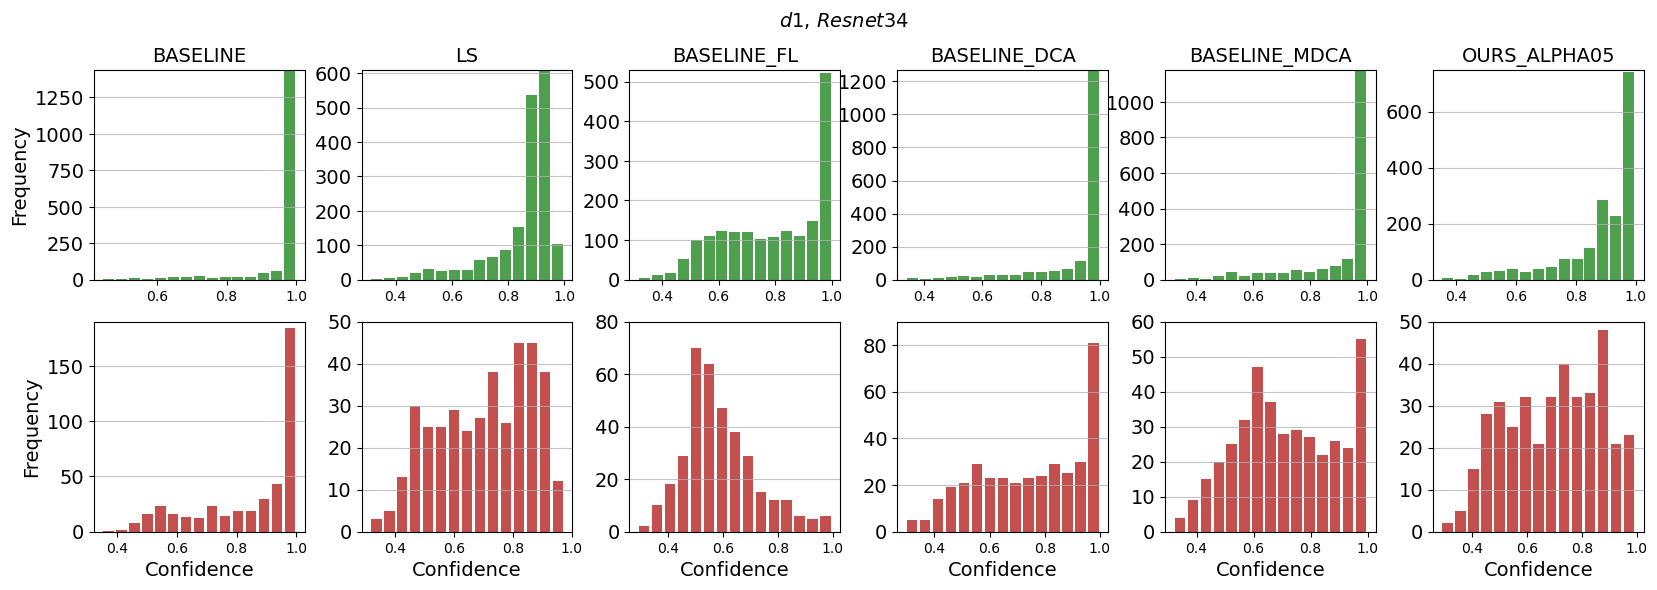

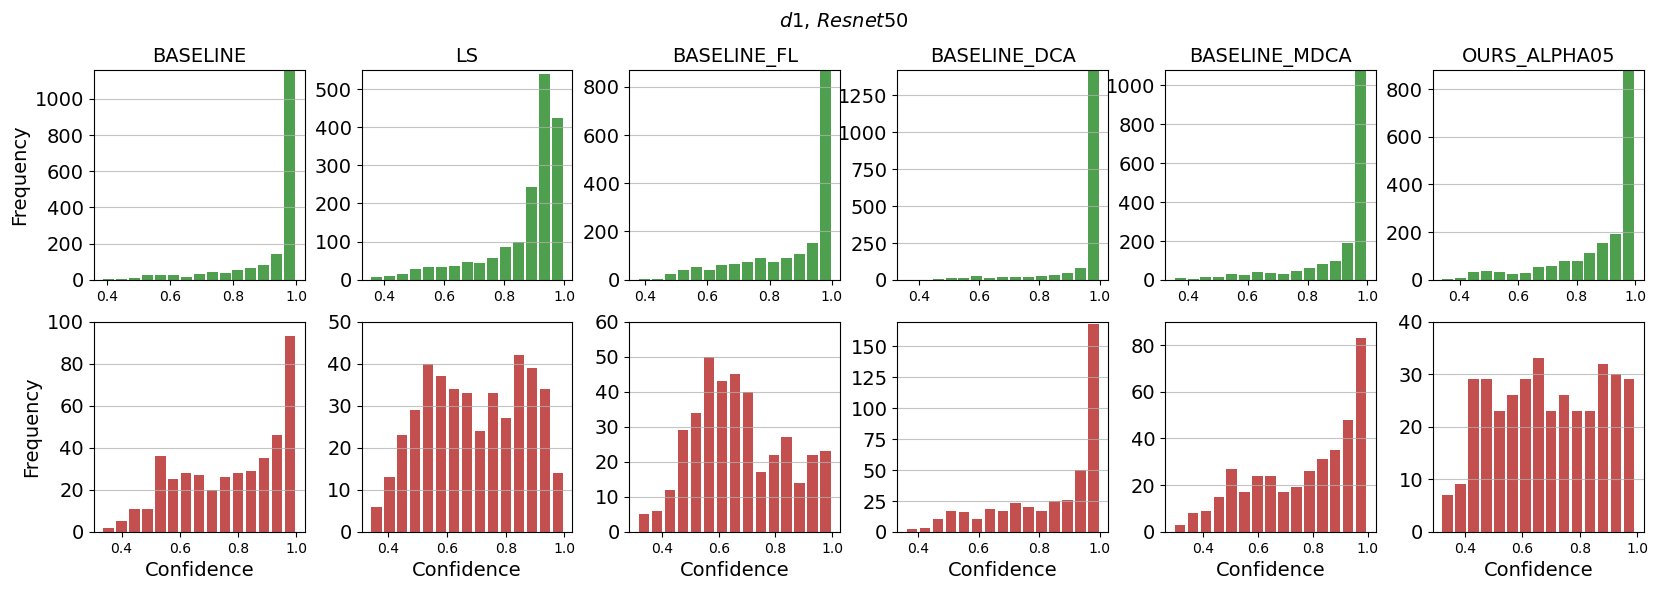

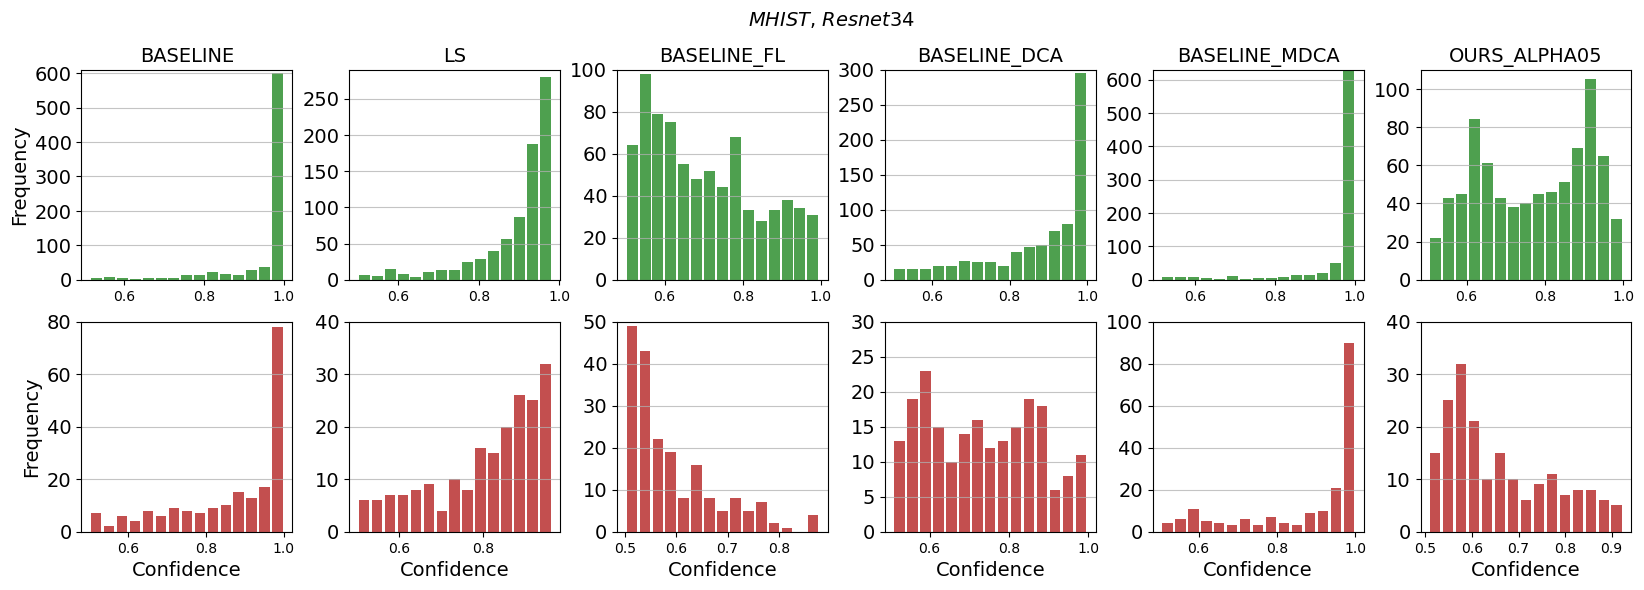

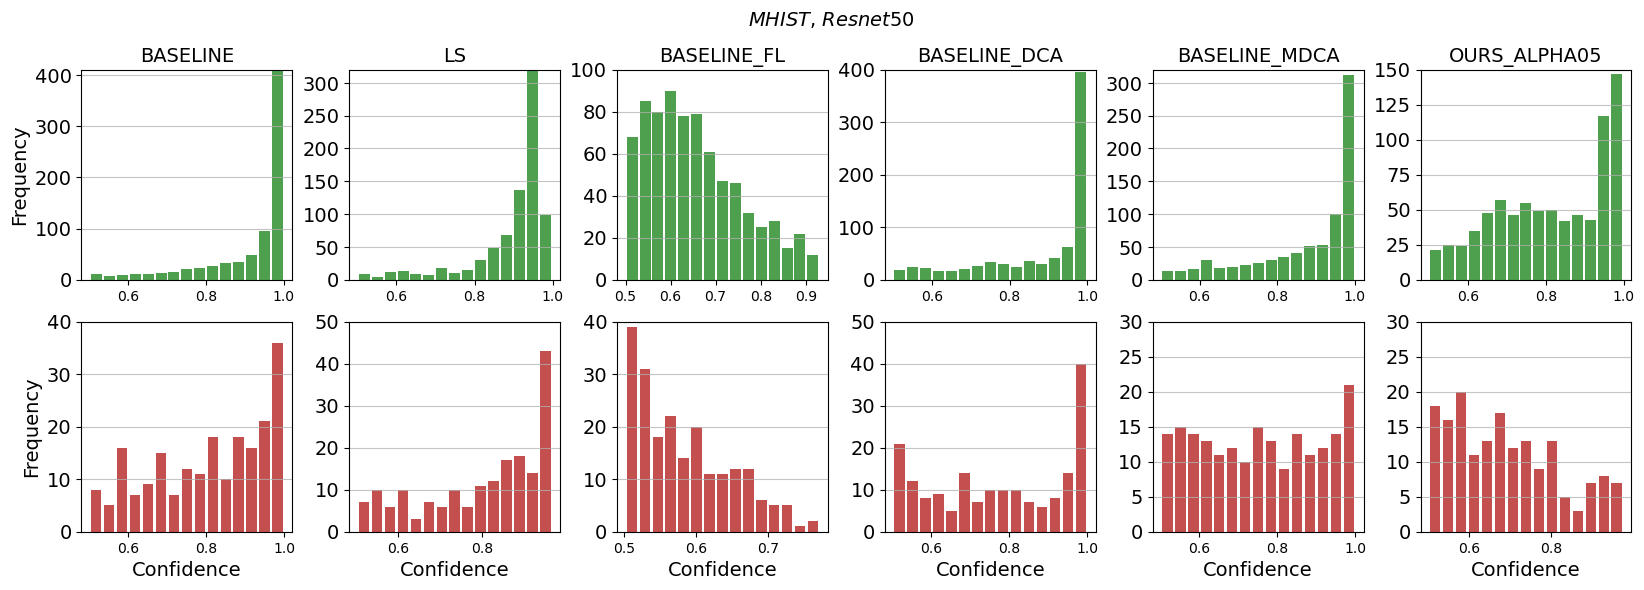

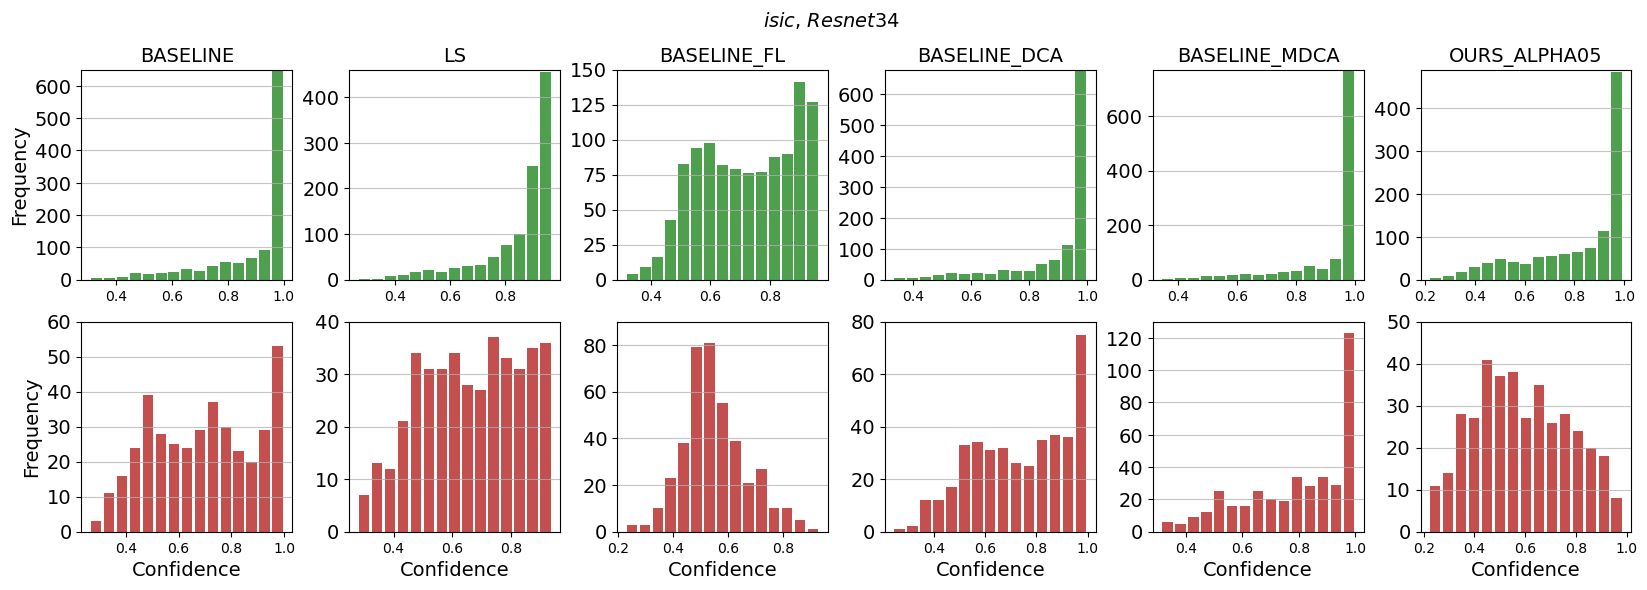

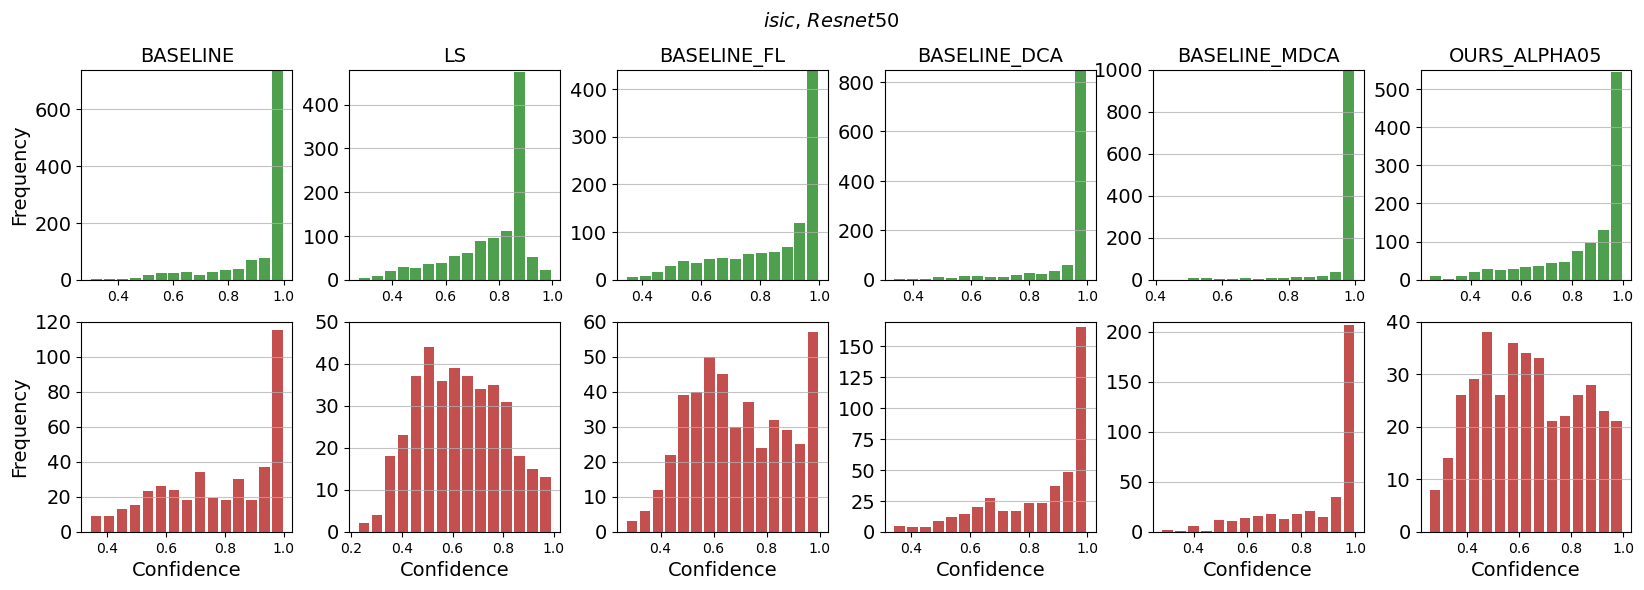

In [10]:
all_histogram_plots_dir = "all_histogram_plots"
if not os.path.exists(all_histogram_plots_dir):
    os.makedirs(all_histogram_plots_dir)
    print(f'Creating {all_histogram_plots_dir} directory...')
        
datasets = ['d1','MHIST','isic']
archs= ['Resnet34', 'Resnet50']
methods = ['baseline', 'ls', 'baseline_fl', 'baseline_dca', 'baseline_mdca', 'ours_alpha05']


num_of_subplots = len(methods)
red, green, blue = '#aa0504', '#037804', '#0504aa' # https://www.colorhexa.com/04aa05

bins_used=15
fs = 14
alp = 0.7

for ds in datasets:
    for arc_idx, arc in enumerate(archs):
        plt.figure(figsize=(20, 6))
        for idx in range(len(methods)*2):
            if idx <= 5:
                plt.subplot(2,num_of_subplots,idx+1)
                # An "interface" to matplotlib.axes.Axes.hist() method
                # n, bins, patches = plt.hist(x=pred_dict[ds][archs[arc_idx]][methods[idx%6]]["correctpredictions"], bins=bins_used, color='black', histtype='step')
                n, bins, patches = plt.hist(x=pred_dict[ds][archs[arc_idx]][methods[idx%6]]["correctpredictions"], bins=bins_used, color=green, alpha=alp, rwidth=0.85)
                plt.grid(axis='y', alpha=0.75)
                # plt.xlabel('Confidence')
                if idx == 0:
                    plt.ylabel('Frequency', fontsize=fs)
                # plt.title(f'Avg. Conf. [C]{np.average(baseline_correctpredictions)*100:.2f}, Acc: {test_acc*100:.2f}; [C: {len(baseline_correctpredictions)}, InC: {len(baseline_incorrectpredictions)}]', fontsize=12)
                maxfreq = n.max()
                # Set a clean upper y-axis limit.
                plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
                # plt.xticks(np.arange(0., 1., 0.3), fontsize=fs)
                plt.yticks(fontsize=fs)
                plt.title(f'{methods[idx%6].upper()}', fontsize=fs)
                # plt.legend()

            else:
                plt.subplot(2,num_of_subplots,idx+1)
                # An "interface" to matplotlib.axes.Axes.hist() method
                # n, bins, patches = plt.hist(x=pred_dict[ds][archs[arc_idx]][methods[idx%6]]["incorrectpredictions"], bins=bins_used, color='black', histtype='step')
                n, bins, patches = plt.hist(x=pred_dict[ds][archs[arc_idx]][methods[idx%6]]["incorrectpredictions"], bins=bins_used, color=red, alpha=alp, rwidth=0.8)
                plt.grid(axis='y', alpha=0.75)
                plt.xlabel('Confidence', fontsize=fs)
                if idx%6 == 0:
                    plt.ylabel('Frequency', fontsize=fs)
                # plt.title(f'Avg. Conf. [InC]{np.average(incorrect_pred)*100:.2f}, Err: {100-(test_acc*100):.2f}; [C: {len(correct_pred)}, InC: {len(incorrect_pred)}]', fontsize=12)
                maxfreq = n.max()
                # Set a clean upper y-axis limit.
                plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
                # plt.xticks(np.arange(0., 1., 0.3), fontsize=fs)
                plt.yticks(fontsize=fs)
                
                # plt.legend()

        plt.subplots_adjust(wspace=.27, hspace=.2)
        plt.suptitle(f'${ds}$, ${archs[arc_idx]}$', fontsize=fs)
        # plt.savefig(f'{all_histogram_plots_dir}/format1_bar_{ds}_{archs[arc_idx]}_histogram_plots.png', bbox_inches='tight', dpi=300)
        plt.show()
        plt.close()

# Step Histogram (Combining plots with correct and incorrect predictions)

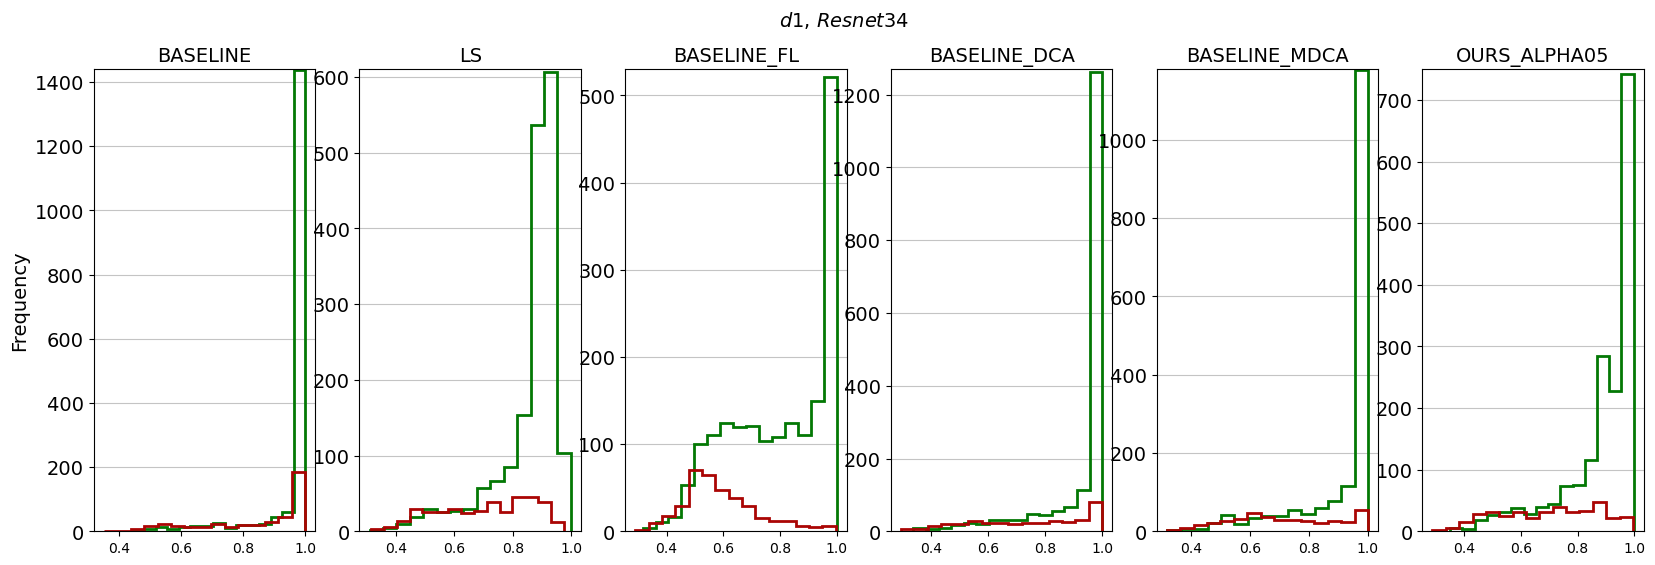

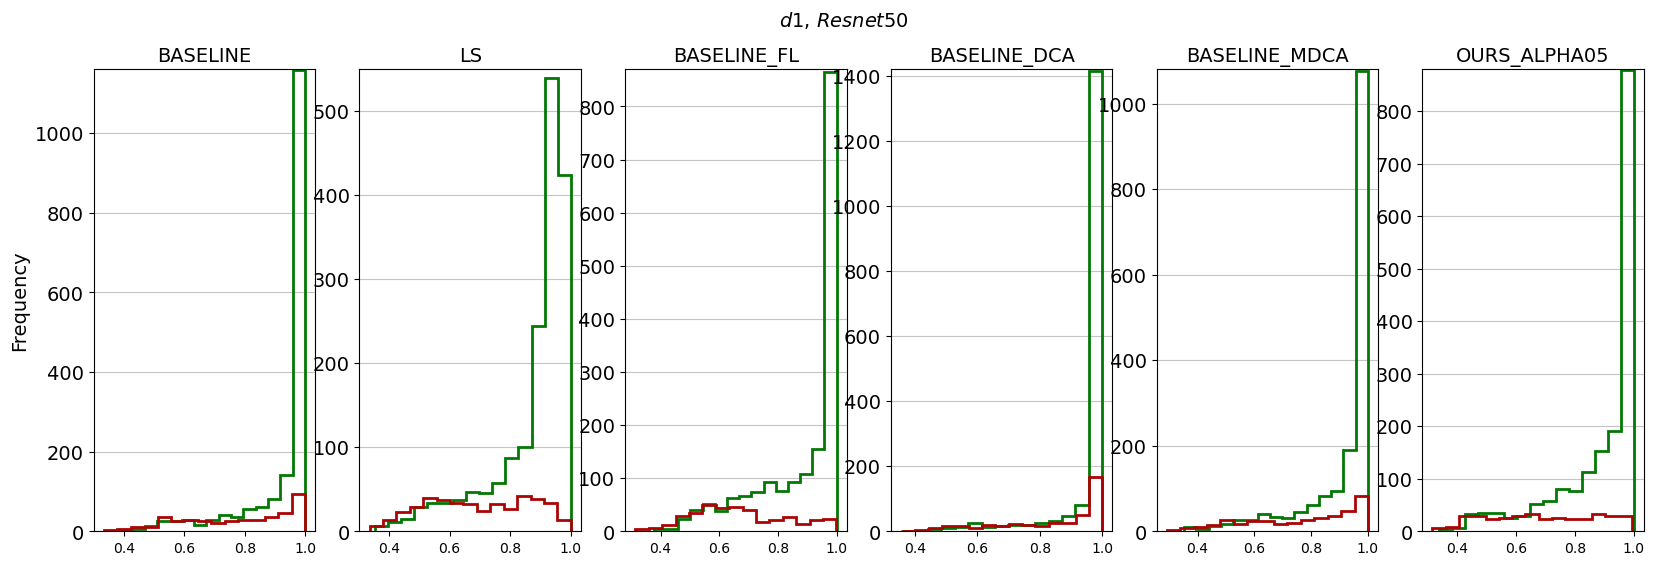

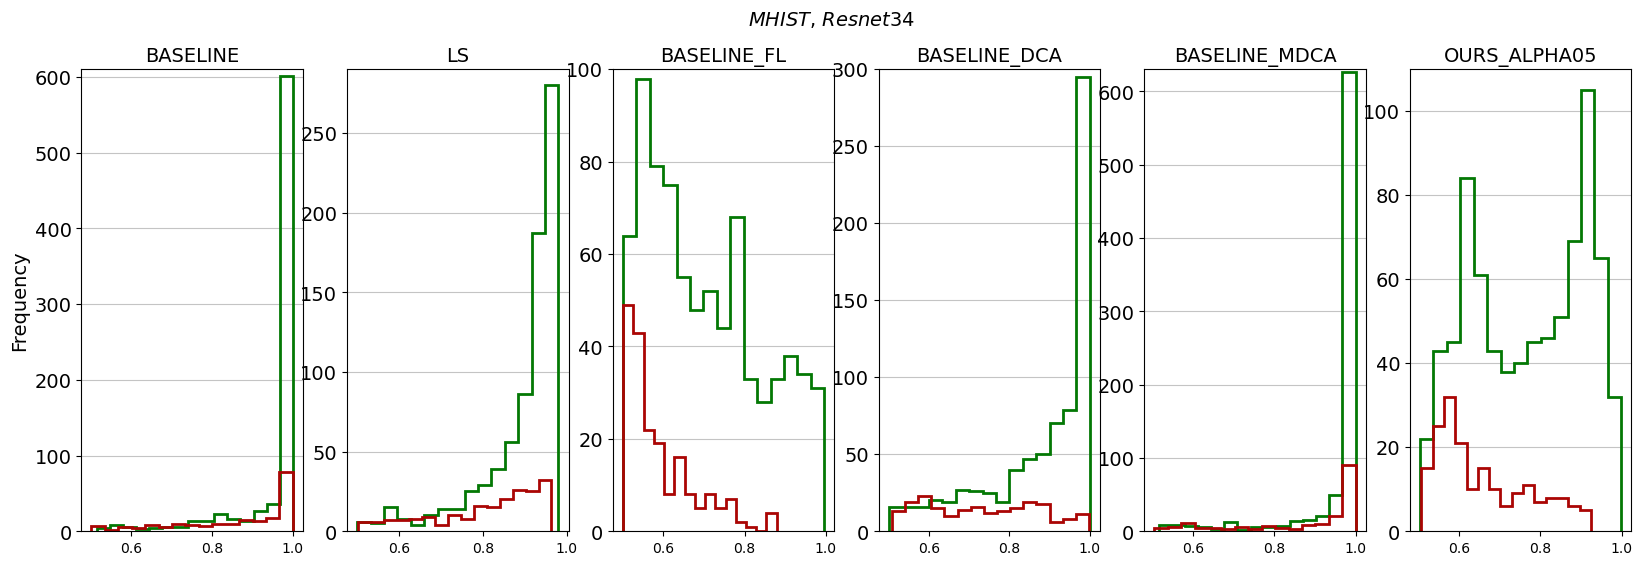

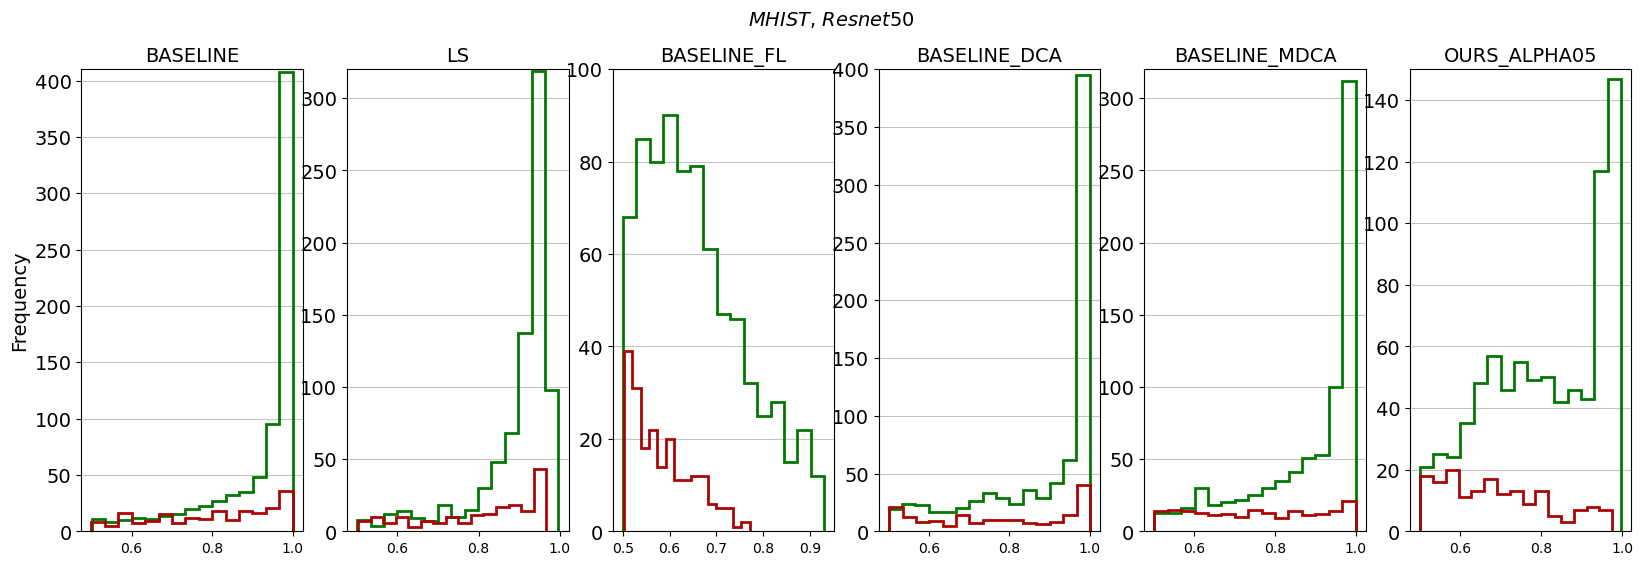

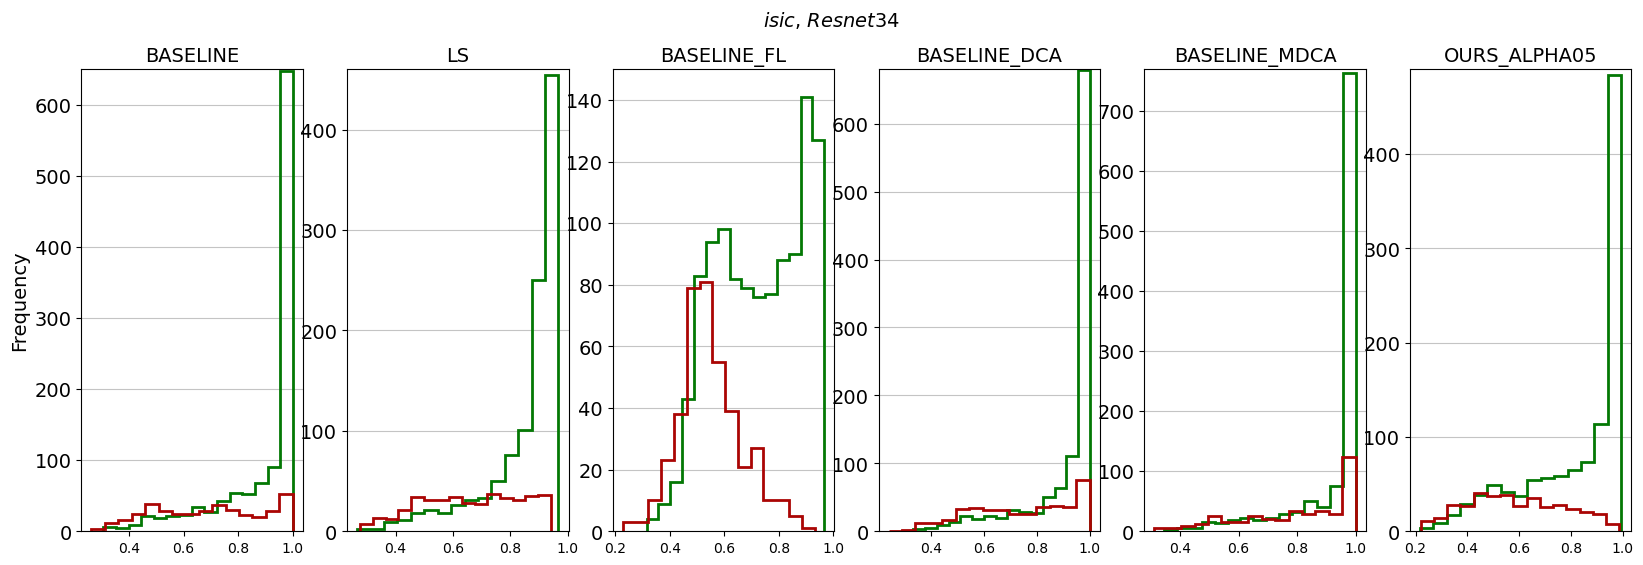

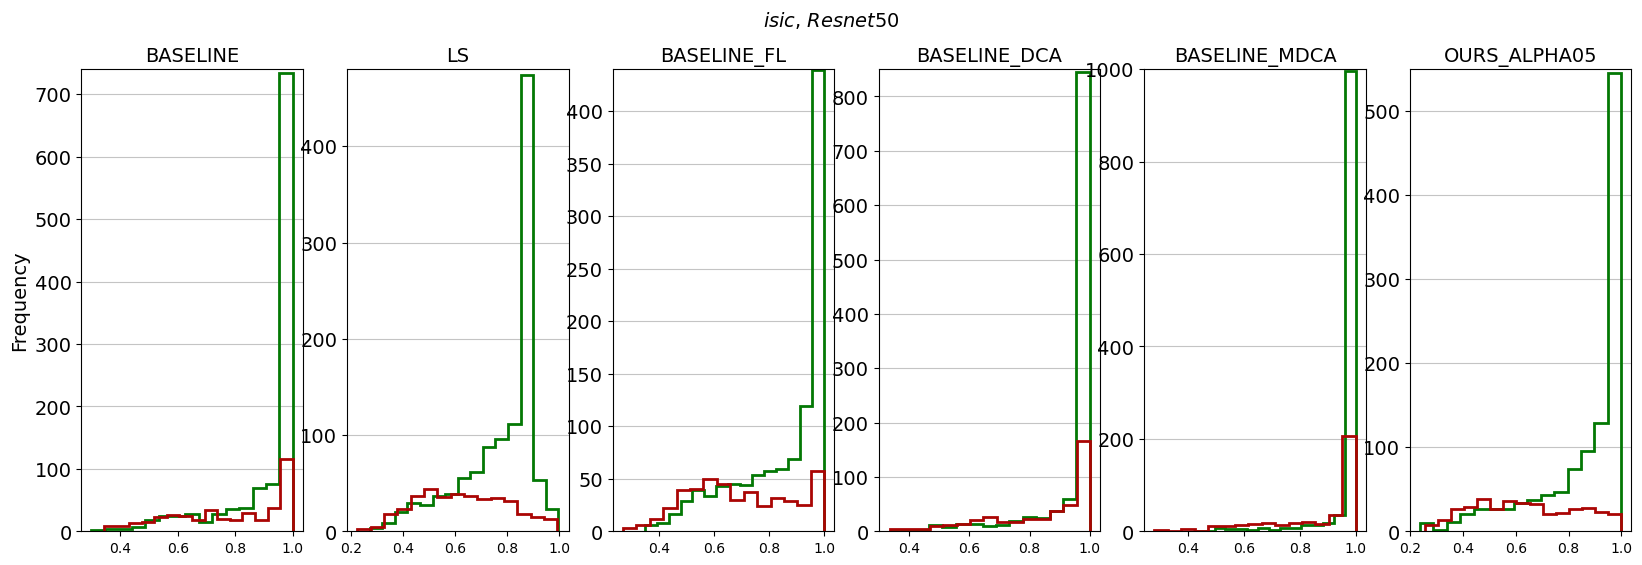

In [6]:
all_histogram_plots_dir = "all_histogram_plots"
if not os.path.exists(all_histogram_plots_dir):
    os.makedirs(all_histogram_plots_dir)
    print(f'Creating {all_histogram_plots_dir} directory...')
        
datasets = ['d1','MHIST','isic']
archs= ['Resnet34', 'Resnet50']
methods = ['baseline', 'ls', 'baseline_fl', 'baseline_dca', 'baseline_mdca', 'ours_alpha05']

num_of_subplots = len(methods)
red, green, blue = '#aa0504', '#037804', '#0504aa' # https://www.colorhexa.com/04aa05

bins_used=15
fs = 14
alp = 1.0
lw=2

for ds in datasets:
    for arc_idx, arc in enumerate(archs):
        plt.figure(figsize=(20, 6))
        for idx in range(len(methods)*2):
            if idx <= 5:
                plt.subplot(1,num_of_subplots,idx+1)
                # An "interface" to matplotlib.axes.Axes.hist() method
                n, bins, patches = plt.hist(x=pred_dict[ds][archs[arc_idx]][methods[idx%6]]["correctpredictions"], bins=bins_used, color=green, alpha=alp, rwidth=0.85, histtype='step', linewidth=lw)
                plt.grid(axis='y', alpha=0.75)
                maxfreq = n.max()
                n, bins, patches = plt.hist(x=pred_dict[ds][archs[arc_idx]][methods[idx%6]]["incorrectpredictions"], bins=bins_used, color=red, alpha=alp, rwidth=0.8, histtype='step', linewidth=lw)
                # plt.xlabel('Confidence')
                if idx == 0:
                    plt.ylabel('Frequency', fontsize=fs)
                # plt.title(f'Avg. Conf. [C]{np.average(baseline_correctpredictions)*100:.2f}, Acc: {test_acc*100:.2f}; [C: {len(baseline_correctpredictions)}, InC: {len(baseline_incorrectpredictions)}]', fontsize=12)
                # Set a clean upper y-axis limit.
                plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
                # plt.xticks(np.arange(0., 1., 0.3), fontsize=fs)
                plt.yticks(fontsize=fs)
                plt.title(f'{methods[idx%6].upper()}', fontsize=fs)
                
                # plt.legend()

        # plt.subplots_adjust(wspace=.27, hspace=.2)
        plt.suptitle(f'${ds}$, ${archs[arc_idx]}$', fontsize=fs)
        # plt.savefig(f'{all_histogram_plots_dir}/format2_step_{ds}_{archs[arc_idx]}_histogram_plots.png', bbox_inches='tight', dpi=300)
        plt.show()
        plt.close()

# Fomatting 3 Stepfill

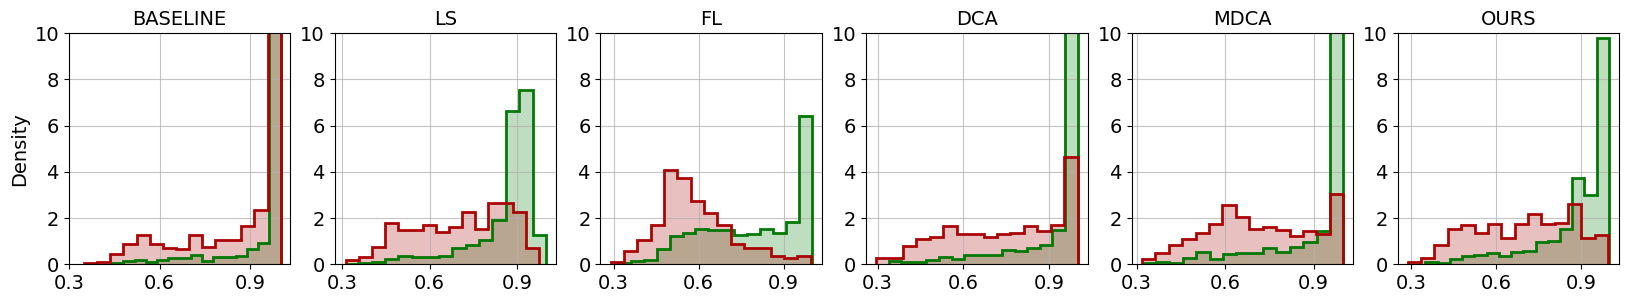

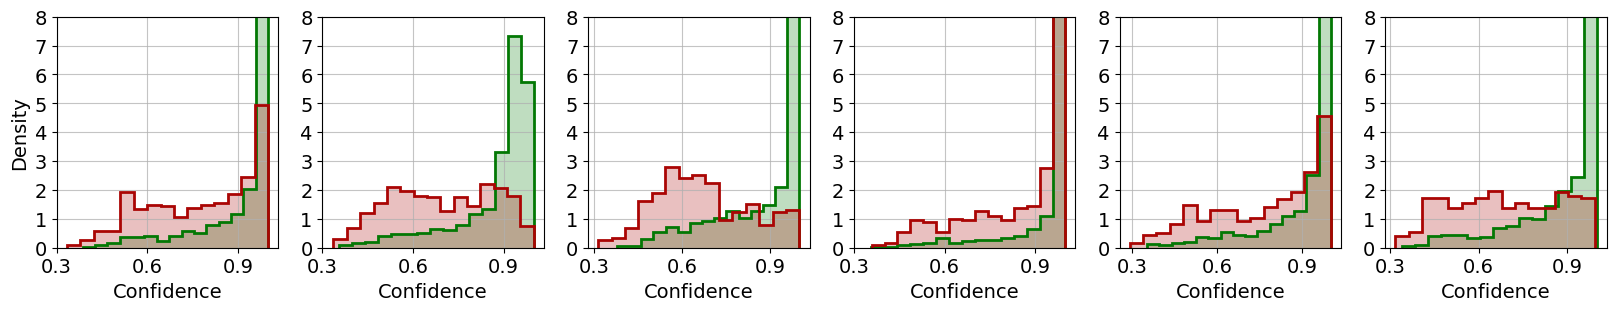

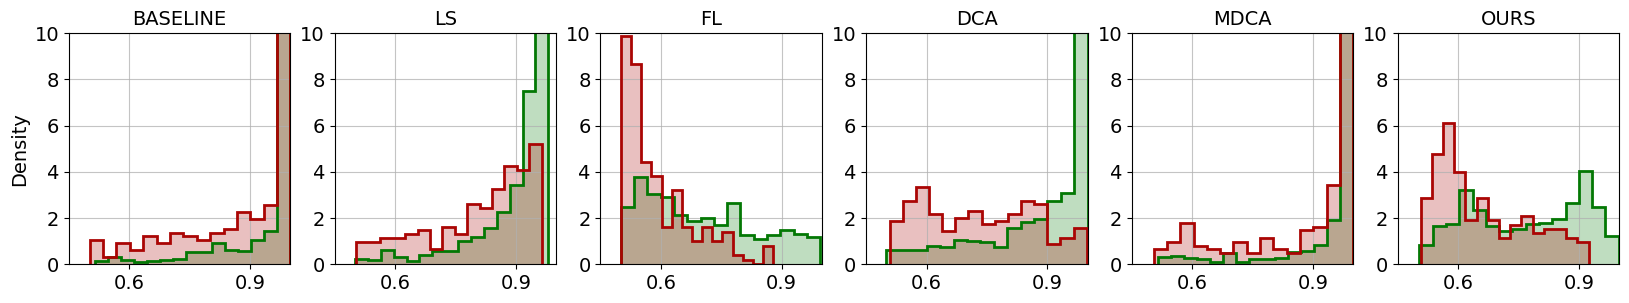

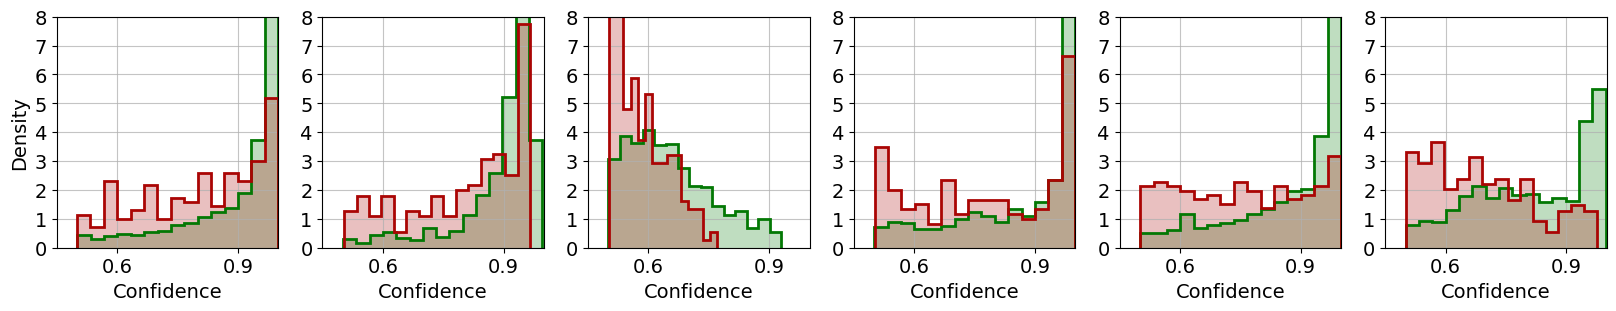

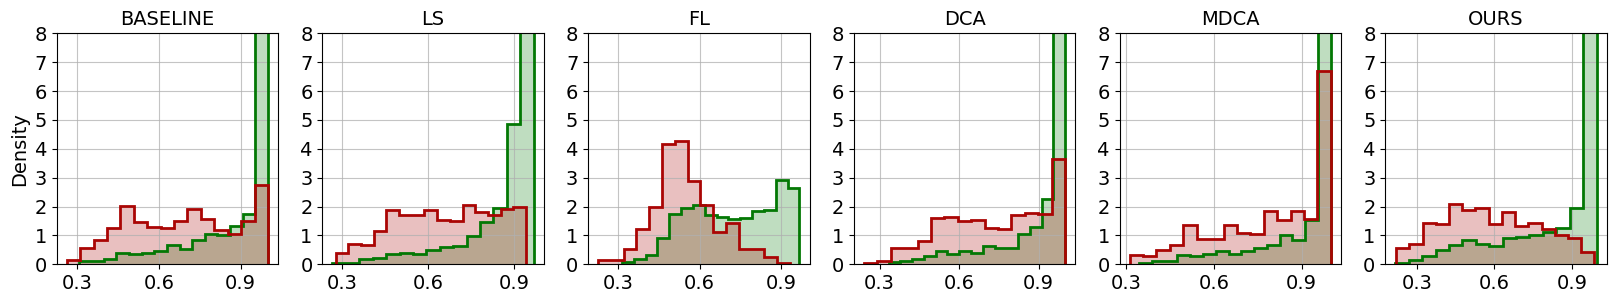

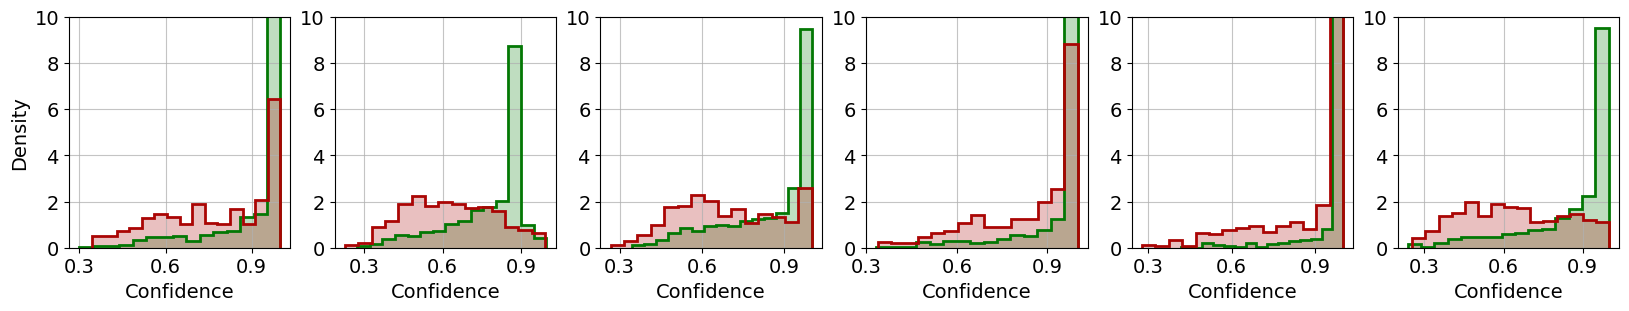

In [26]:
all_histogram_plots_dir = "all_histogram_plots"
if not os.path.exists(all_histogram_plots_dir):
    os.makedirs(all_histogram_plots_dir)
    print(f'Creating {all_histogram_plots_dir} directory...')
        
datasets = ['d1','MHIST','isic']
archs= ['Resnet34', 'Resnet50']
methods = ['baseline', 'ls', 'baseline_fl', 'baseline_dca', 'baseline_mdca', 'ours_alpha05']

num_of_subplots = len(methods)
red, green, blue = '#aa0504', '#037804', '#0504aa' # https://www.colorhexa.com/04aa05

bins_used=15
fs = 14
alp = .25
lw=2
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams["font.family"] = "monospace"
# plt.rcParams["font.monospace"] = ["FreeMono"]

for ds in datasets:
    for arc_idx, arc in enumerate(archs):
        plt.figure(figsize=(20, 3))
        for idx in range(len(methods)*2):
            if idx <= 5:
                plt.subplot(1,num_of_subplots,idx+1)
                # An "interface" to matplotlib.axes.Axes.hist() method
                n, bins, patches = plt.hist(x=pred_dict[ds][archs[arc_idx]][methods[idx%6]]["correctpredictions"], bins=bins_used, color=green, alpha=alp, rwidth=0.85, histtype='stepfilled', linewidth=lw, density=True)
                n, bins, patches = plt.hist(x=pred_dict[ds][archs[arc_idx]][methods[idx%6]]["correctpredictions"], bins=bins_used, color=green, rwidth=0.85, histtype='step', linewidth=lw, density=True)
                # plt.grid(axis='y', alpha=0.75)
                plt.grid(alpha=0.75)
                # maxfreq = n.max()
                
                n, bins, patches = plt.hist(x=pred_dict[ds][archs[arc_idx]][methods[idx%6]]["incorrectpredictions"], bins=bins_used, color=red, alpha=alp, rwidth=0.8, histtype='stepfilled', linewidth=lw, density=True)
                n, bins, patches = plt.hist(x=pred_dict[ds][archs[arc_idx]][methods[idx%6]]["incorrectpredictions"], bins=bins_used, color=red, rwidth=0.8, histtype='step', linewidth=lw, density=True)
                
                if idx == 0:
                    plt.ylabel('Density', fontsize=fs)
                
                # plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
                plt.xticks(np.arange(0.3, 1., 0.3), fontsize=fs)
                plt.yticks(fontsize=fs)
                
                if archs[arc_idx] == 'Resnet50':
                    plt.xlabel('Confidence', fontsize=fs)
                    
                
                # # Making the y-axis of some plots integer. Manual checking.
                # if ds== 'd1' and methods[idx%6] == 'baseline_dca' and archs[arc_idx]=='Resnet34':
                #     plt.yticks(np.arange(0,16,3), fontsize=fs)
                # if ds== 'd1' and methods[idx%6] == 'baseline' and archs[arc_idx]=='Resnet50':
                #     plt.yticks(np.arange(0,16,3), fontsize=fs)
                # if ds== 'MHIST' and methods[idx%6] == 'baseline' and archs[arc_idx]=='Resnet50':
                #     plt.yticks(np.arange(0,16,3), fontsize=fs)
                # if ds== 'isic' and methods[idx%6] == 'baseline_dca' and archs[arc_idx]=='Resnet50':
                #     plt.ylim(0,19)
                #     plt.yticks(np.arange(0,19,3), fontsize=fs)
                # if ds== 'isic' and methods[idx%6] == 'baseline_mdca' and archs[arc_idx]=='Resnet34':
                #     plt.yticks(np.arange(0,16,3), fontsize=fs)
                
                #  (Clipping the yaxis)
                if ds== 'd1' and archs[arc_idx] == 'Resnet34':
                    plt.ylim(0, 10)
                if ds== 'd1' and archs[arc_idx] == 'Resnet50':
                    plt.ylim(0, 8)
                    
                if ds== 'MHIST' and archs[arc_idx] == 'Resnet34':
                    plt.ylim(0, 10)
                    plt.xlim(0.45, 1)
                if ds== 'MHIST' and archs[arc_idx] == 'Resnet50':
                    plt.ylim(0, 8)
                    plt.xlim(0.45, 1)
                    
                if ds== 'isic' and archs[arc_idx] == 'Resnet34':
                    plt.ylim(0, 8)
                if ds== 'isic' and archs[arc_idx] == 'Resnet50':
                    plt.ylim(0, 10)
                    
                    
                if archs[arc_idx] == 'Resnet34':
                    if methods[idx%6].upper().split("_")[-1] != "ALPHA05":
                        plt.title(f'{methods[idx%6].upper().split("_")[-1]}', fontsize=fs)
                    else:
                        plt.title(f'OURS', fontsize=fs)
                    # print(methods[idx%6].upper().split("_")[-1])
                
                # plt.legend()

        # plt.subplots_adjust(wspace=.27, hspace=.2)
        # plt.suptitle(f'${ds}$, ${archs[arc_idx]}$', fontsize=fs)
        plt.tight_layout()
        # plt.savefig(f'{all_histogram_plots_dir}/format3_stepfill_{ds}_{archs[arc_idx]}_histogram_plots.png', bbox_inches='tight', dpi=300)
        plt.show()
        plt.close()